In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
df = pd.read_csv('bank_marketing.csv')

# PART I - EDA

In [4]:
# 데이터 구조 살펴보기
display(df) #Initial structure of the data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# 전체 데이터 정보 파악하기
print("1. 원 데이터 크기: ", df.shape)
print("")
print("2. 변수 리스트:")
print(df.columns.values)
print("")
print("3. 데이터 정보 요약 출력:")
print(df.info())
print("")
print("4. 데이터 타입 확인 출력:")
print(df.dtypes)
print("")
print("5. null 데이터 여부 확인 출력:")
print(df.isnull().sum())
print("")


1. 원 데이터 크기:  (45211, 17)

2. 변수 리스트:
['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'y']

3. 데이터 정보 요약 출력:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   4

    위의 분석을 통해 
    1. 원 데이터 크기는 (45211, 17) 임을 알 수 있다.
    
    2. 변수는 입력 변수 16 종류 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']에 출력 변수 1종류 ['y'] 로 이루어져 있음을 알 수 있다.
    
    3. 데이터 정보 요약 및 데이터 타입을 통해 numerical data는 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous' 7종류이고, categorical data는 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome' 9종류이다. 참고로 출력 변수 'y'도 categorical data이다. 
    
    4. null 데이터는 없다. 

In [6]:
# Select a numeric and category column name of dataset
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
category_col = df.select_dtypes(include=['object']).columns
print(numeric_col)
print(category_col)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


    numerical data와 categorical data는 서로 다른 특성을 가지기 때문에 분리해서 분석할 필요가 있다.

PART I-1. numerical data 분석 

In [7]:
# numerical data의 statistical summary 확인
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


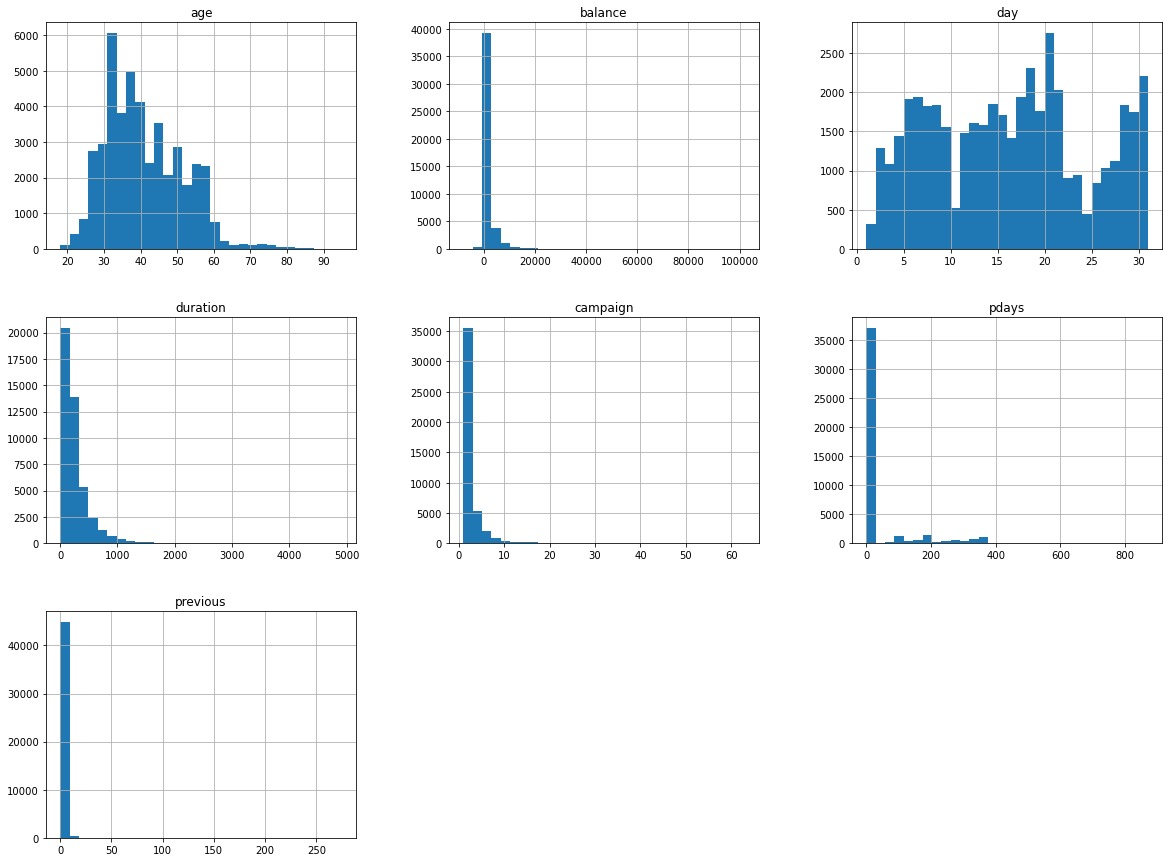

In [8]:
# 히스토그램으로 표현한 numerical data의 visualize distribution
%matplotlib inline
df[numeric_col].hist(bins=30, figsize=(20,15))
plt.show()

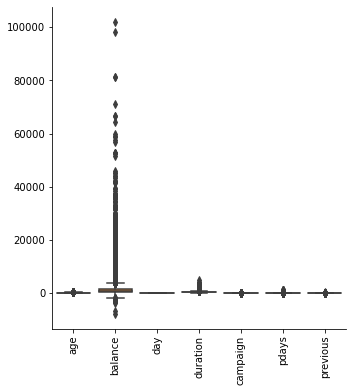

In [9]:
# 박스플랏으로 표현한 numerical data의 visualization
sns.catplot(data=df,kind='box')
plt.xticks(rotation=90)
plt.show()

    balance 값이 현저하게 높음을 알 수 있다. 향후 encodeing 과정 혹은 preprocessing 과정 등에서 정규화가 될 것이다.

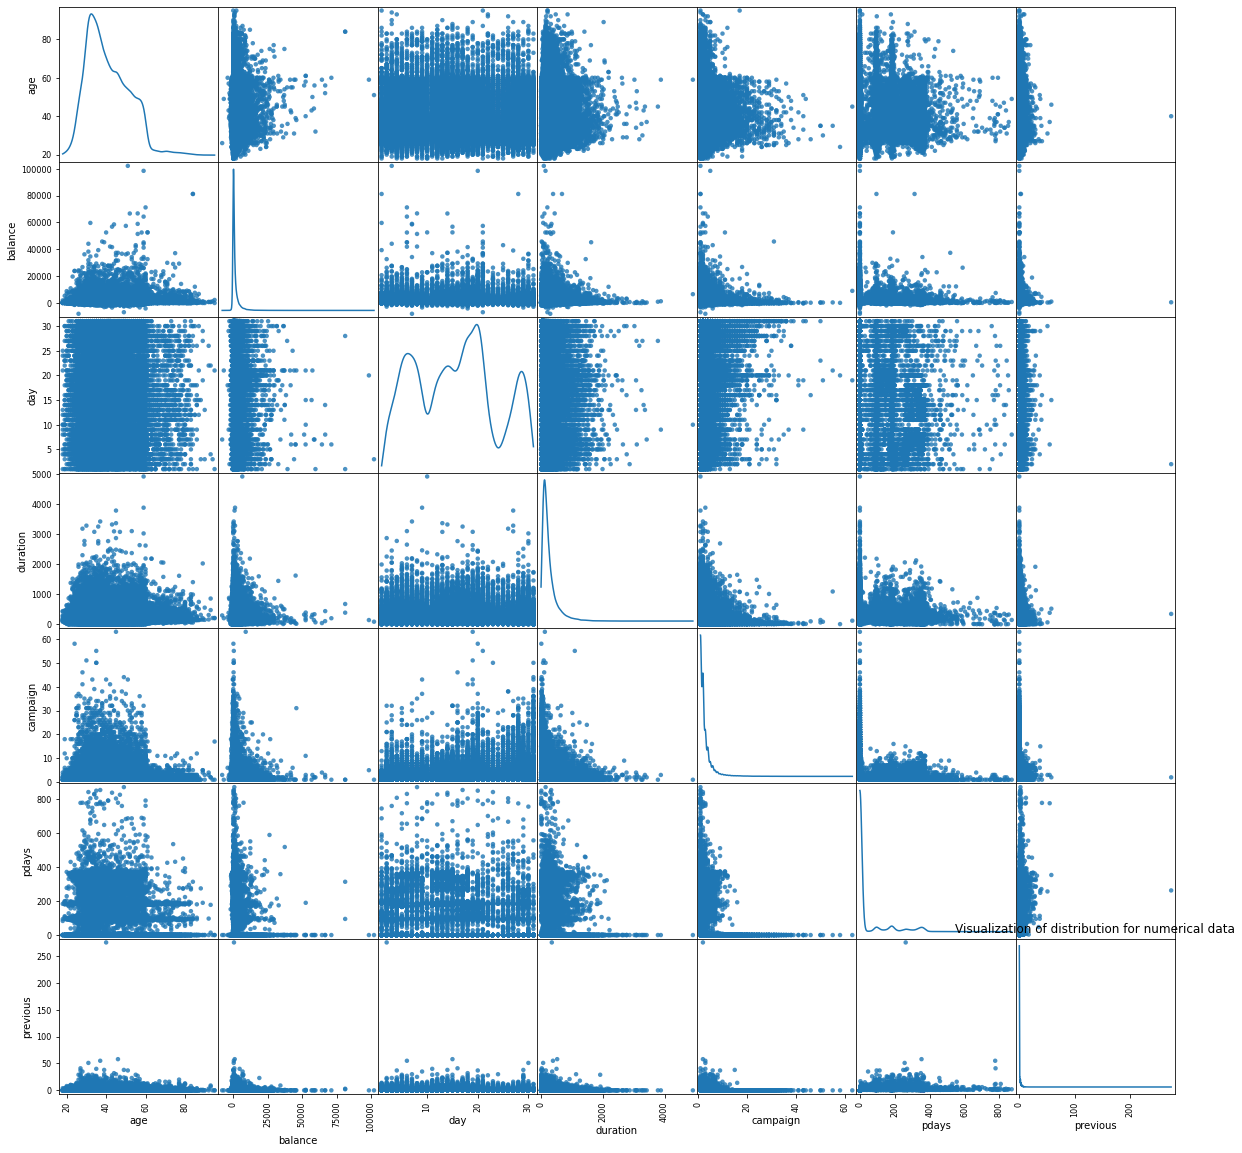

In [10]:
# numerical data의 distribution을 시각화
grr = pd.plotting.scatter_matrix(df, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, diagonal='kde')
plt.title('Visualization of distribution for numerical data')
plt.show()

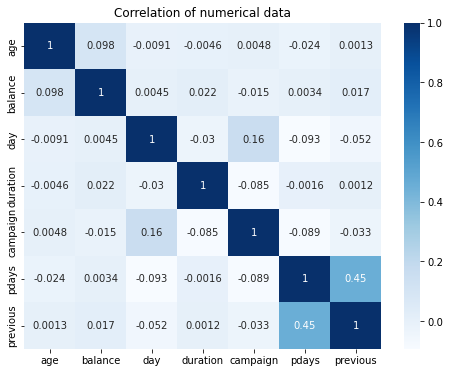

In [11]:
# 각 numerical data의 상관성을 확인해보기 위해 heatmap을 그려보면 다음과 같다.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.title('Correlation of numerical data')
plt.show()

    pdays와 previous 는 연관성이 꽤 높고 그 다음은 day 와 campaign, 그리고 age와 balance 순으로 연관성이 있음을 알 수 있다.

PART I-2. categorical data 분석 

    다음은, categorical data를 분석하고자 한다. 먼저, 각 data의 value의 갯수 및 name이 어떻게 구성되어 있는지 확인한다.

In [12]:
# 각 categorical data의 value의 갯수 파악
for col in category_col:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


In [13]:
# categorical data의 각 명과 각 데이터셋에 있는 데이터 명 및 갯수 파악
for col in category_col:
    print({col})
    print('-'*30)
    print(df[col].value_counts(), "\n")
    print('')

{'job'}
------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 


{'marital'}
------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 


{'education'}
------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 


{'default'}
------------------------------
no     44396
yes      815
Name: default, dtype: int64 


{'housing'}
------------------------------
yes    25130
no     20081
Name: housing, dtype: int64 


{'loan'}
------------------------------
no     37967
yes     7244
Name: loan, dtype: int64 


{'contact'}
------------------------------
cellular     29285
unknown      13020
telephone    

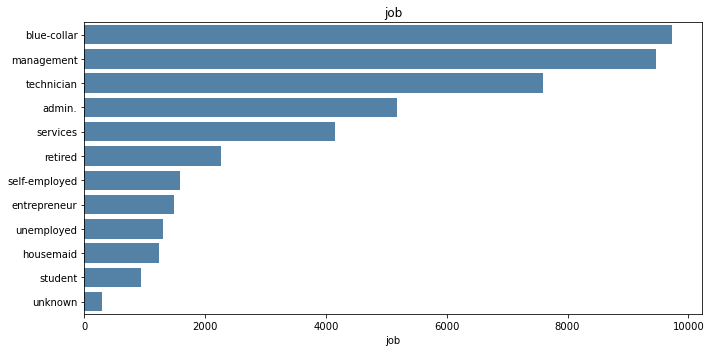

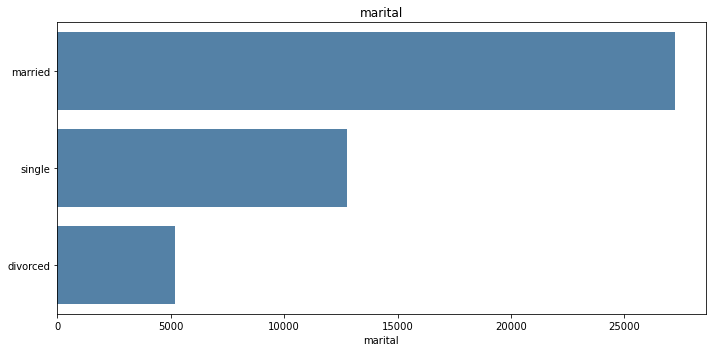

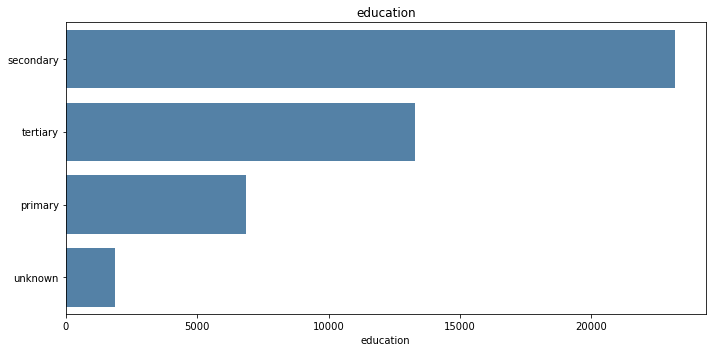

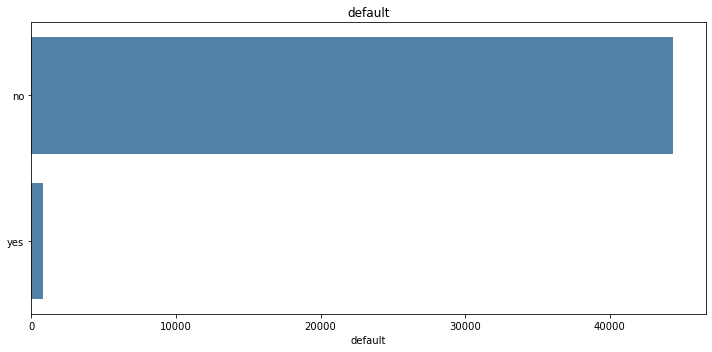

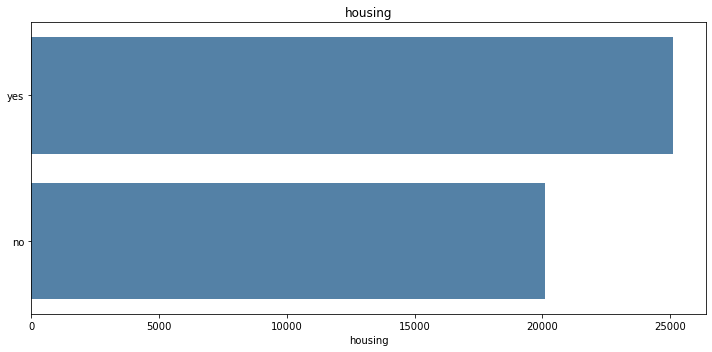

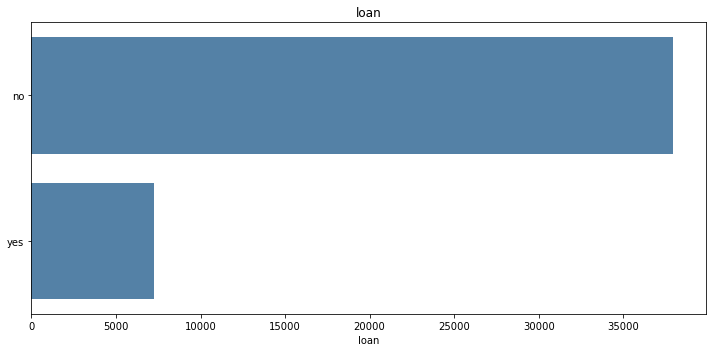

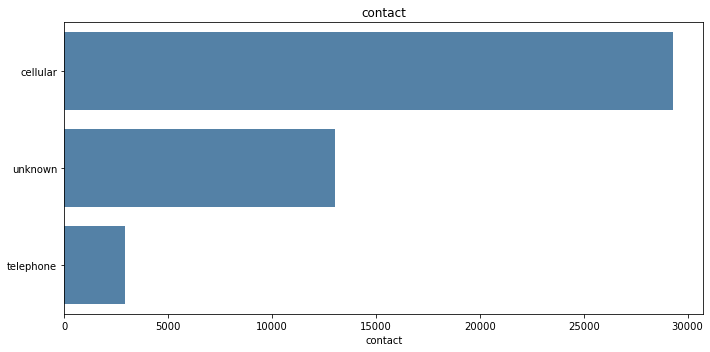

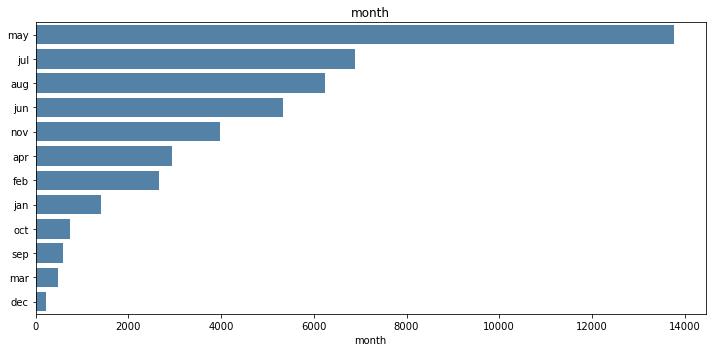

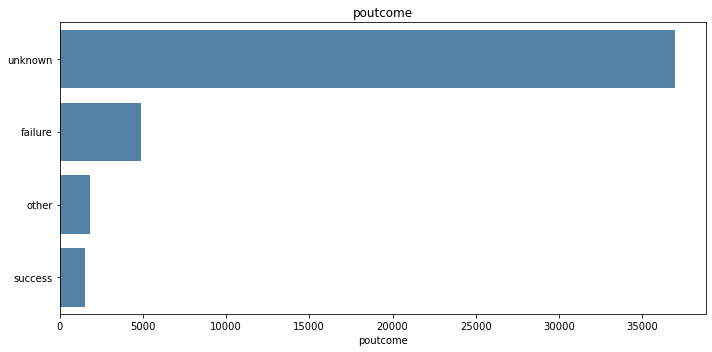

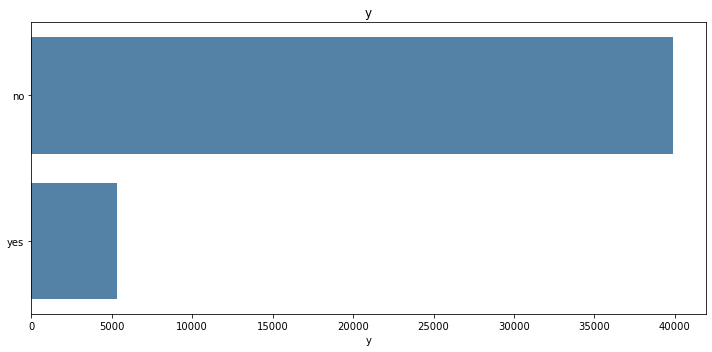

In [14]:
# categorical data의 visualize a count values 
for col in category_col:
    plt.figure(figsize=(10,5))    
    sns.barplot(x=df[col].value_counts(), y=df[col].value_counts().index, data=df, color='steelblue')    
    plt.title(col)    
    plt.tight_layout()

    각 카테고리 데이터의 특징들을 살펴볼 수 있으며, 특히 출력 변수 y 가 imbalance함을 확인할 수 있다.

PART I-3. y에 따른 numerical data 및 categorical data 분석

    PART I-3-1. 출력변수 y의 특징

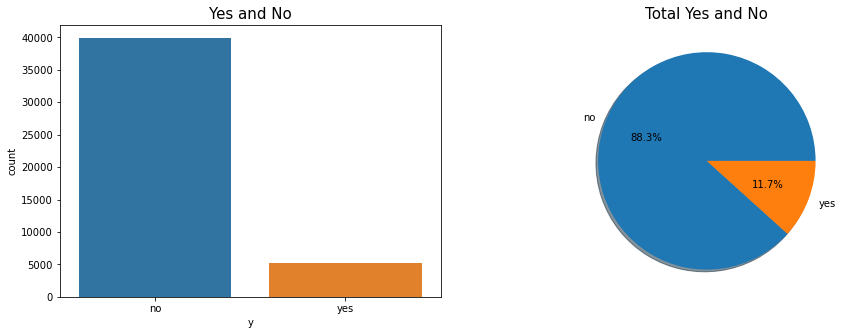

In [15]:
# 출력 변수 y의 특징
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='y',data=df)
plt.title('Yes and No',size = 15)
plt.subplot(1,2,2)
labels =df['y'].value_counts(sort = True).index
sizes = df['y'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Total Yes and No',size = 15)
plt.show()

    적금 가입률이 11.7 % 정도 밖에 되지 않는 high imbalance data 임을 알 수 있다.

    PART I-3-2. 출력변수 y에 대한 입력 수치 데이터들의 다양한 특징

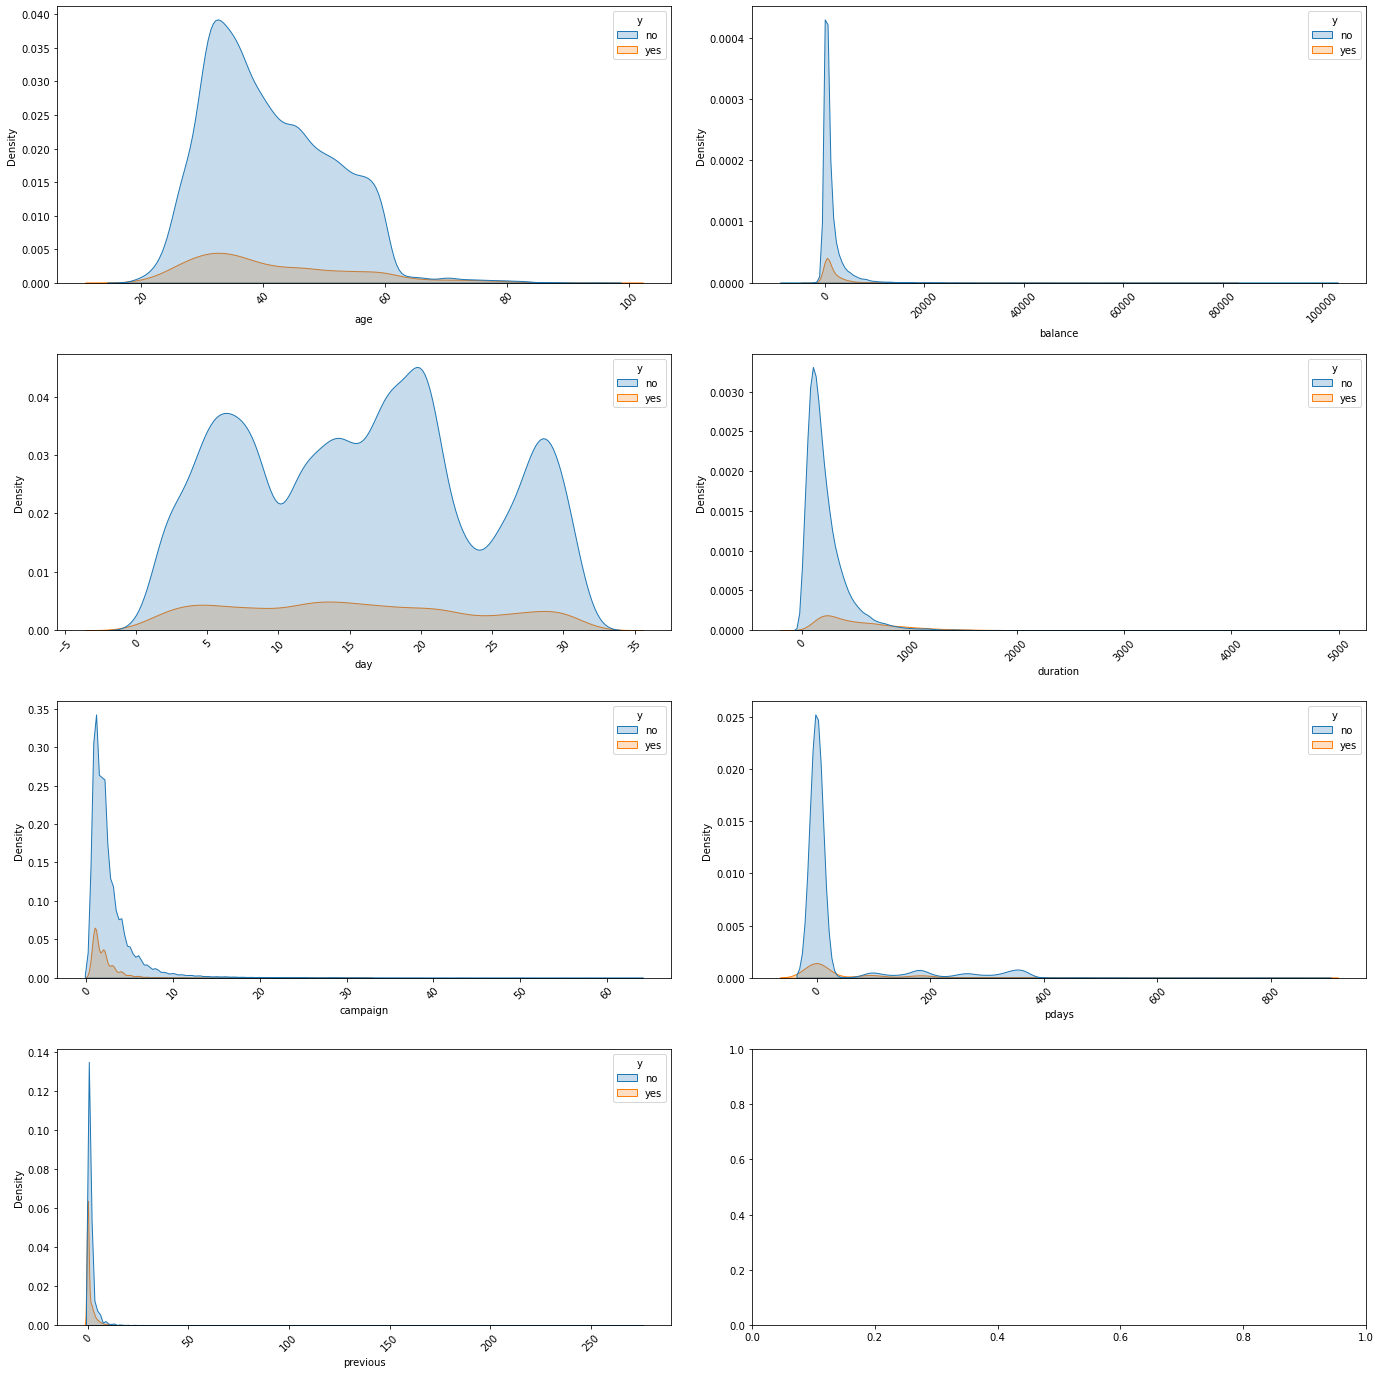

In [16]:
# numerical data for 'y'
fig, axes = plt.subplots(4,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(numeric_col, axes.flatten()):
    sns.kdeplot(x=col,data=df, hue='y', ax=ax, fill=True)
    ax.tick_params(axis='x', rotation=45)

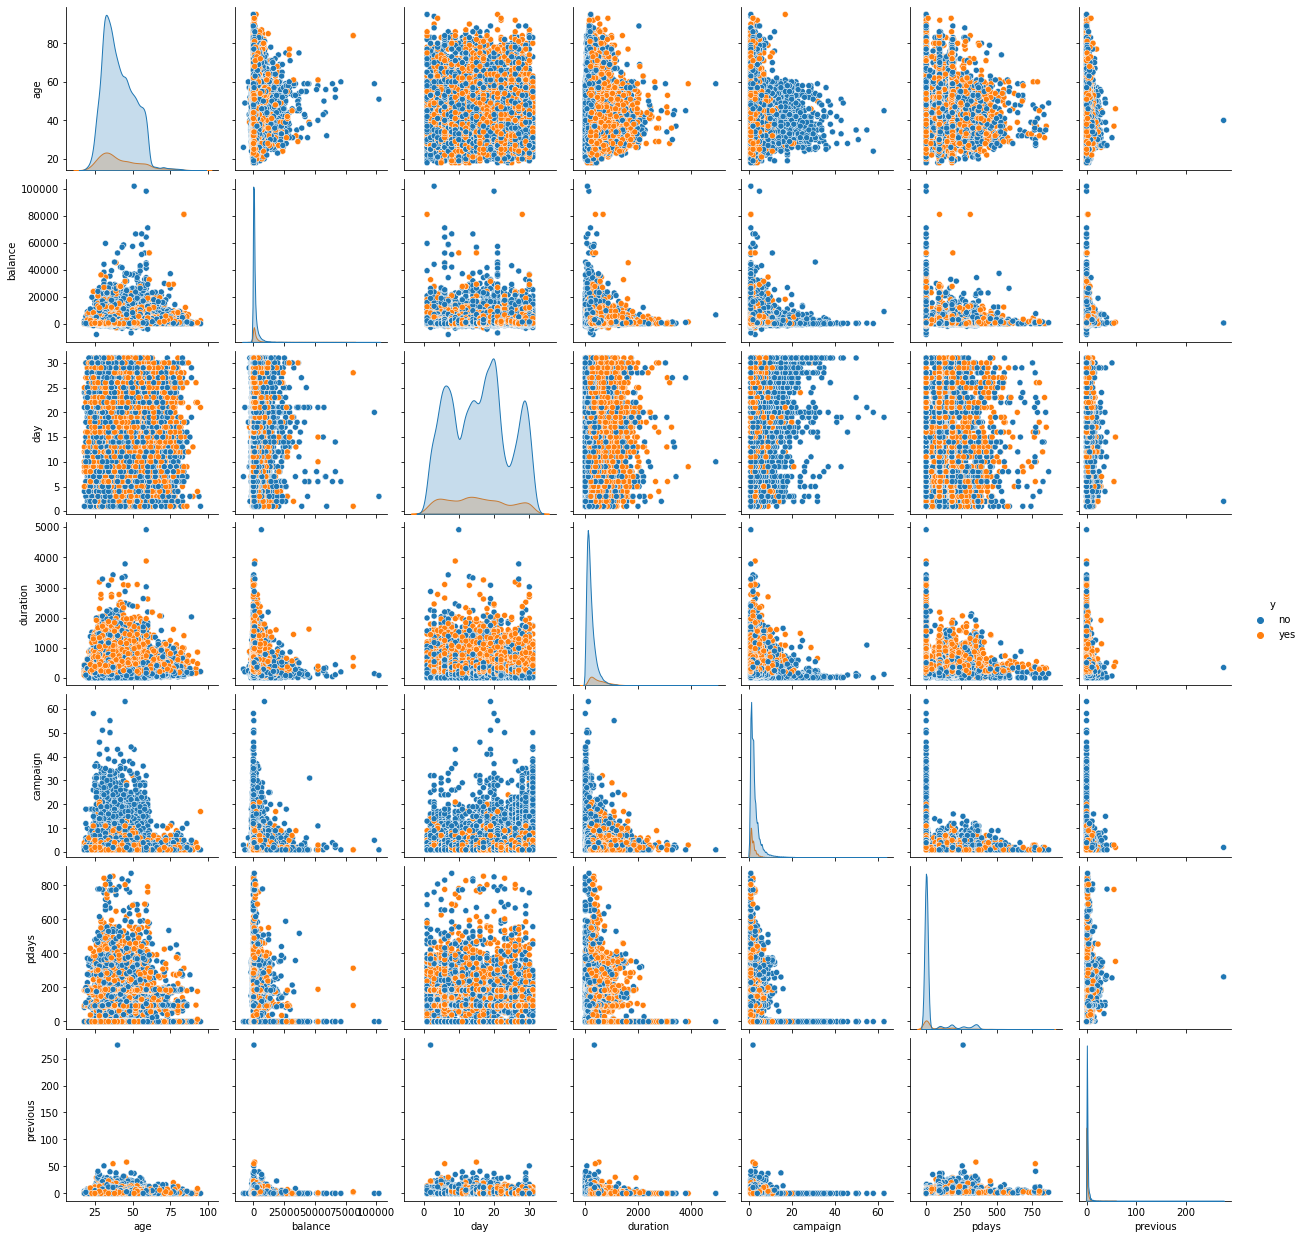

In [17]:
# pairplot with numerical data using hue='y' 
sns.pairplot(df, hue='y')
plt.show()

    PART I-3-3. 출력변수 y에 대한 입력 카테고리 데이터들의 다양한 특징

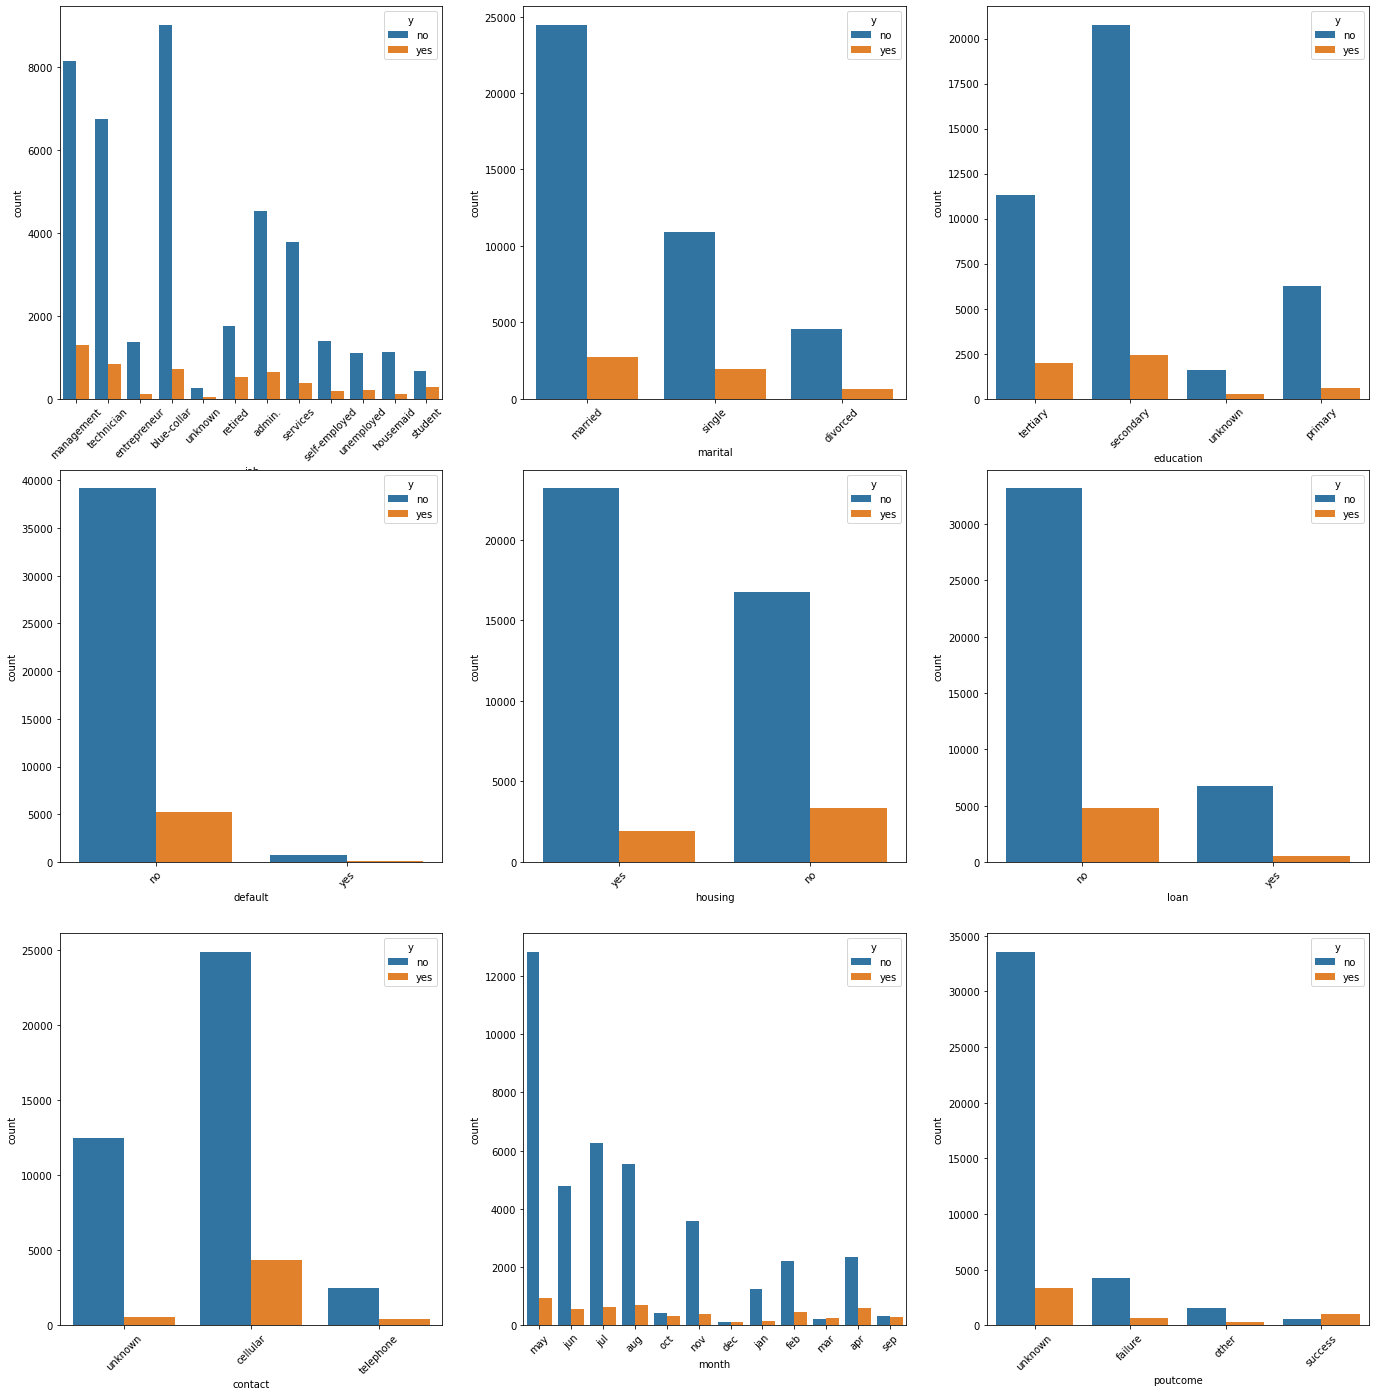

In [18]:
# categorical data for 'y'
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(category_col, axes.flatten()):
    sns.countplot(x=col,data=df, hue='y', ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.show()

    구체적인 분석을 위해 연령별, 별 가입률을 시각화해서 확인해보고자 한다. 

        PART I-3-4. 출력변수 y에 연령별, 잔액별, 직업별 등에 대한 특징 시각화

    1. 연령과 출력 변수 y 와의 특징 

In [19]:
# 'age' 수치 데이터를 20, 30, 40, 50, 60대 이상으로 각각 나누어서 그룹화
df.loc[df["age"] < 30,  'age_group'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age_group'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age_group'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age_group'] = 50
df.loc[df["age"] >= 60, 'age_group'] = 60

In [20]:
# 'age' 수치 데이터를 20, 30, 40, 50, 60대 이상으로 각각 나누어서 그룹화
age_rate_sub = df[df['y'] == 'yes'][['age_group', 'y']].groupby('age_group').count()
age_rate_nosub = df[df['y'] == 'no'][['age_group', 'y']].groupby('age_group').count()

age_rate_sub.y = age_rate_sub.y/age_rate_sub.y.sum() * 100
age_rate_nosub.y = age_rate_nosub.y/age_rate_nosub.y.sum() * 100
    
print('연령별 적금에 가입한 비율 (%):')
print(age_rate_sub)
print('')
print('연령별 적금에 가입하지 않은 비율 (%):')
print(age_rate_nosub)
print('')

연령별 적금에 가입한 비율 (%):
                   y
age_group           
20.0       17.545850
30.0       36.169408
40.0       20.098317
50.0       14.842125
60.0       11.344299

연령별 적금에 가입하지 않은 비율 (%):
                   y
age_group           
20.0       10.883723
30.0       40.519012
40.0       26.531737
50.0       19.099745
60.0        2.965783



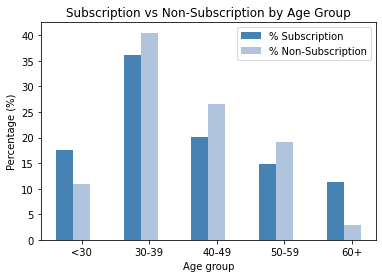

In [21]:
# 연령별 가입율 비가입율 시각화 

# x축에서의 bar위치 설정
barWidth = 0.25
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]

# 바 그래프 만들기
plt.bar(br1, age_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2, age_rate_nosub.y, color ='lightsteelblue', width = barWidth,
        label ='% Non-Subscription')
 
# 제목 및 축 이름 설정
plt.title('Subscription vs Non-Subscription by Age Group')
plt.xlabel('Age group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(5)],
        ['<30', '30-39', '40-49', '50-59', '60+'])
 
plt.legend()
plt.show()

In [22]:
# 
count_age_response = pd.crosstab(df['y'], df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response = count_age_response.transpose()

age = pd.DataFrame(df['age_group'].value_counts())
age = age.sort_index()
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response['yes']
age.drop('age_group',axis = 1 ,inplace = True)
age

,% Contacted,% Subscription
20.0,11.663091,17.599090
30.0,40.010175,10.575488
40.0,25.779125,9.120549
50.0,18.601668,9.334126
60.0,3.945942,33.632287


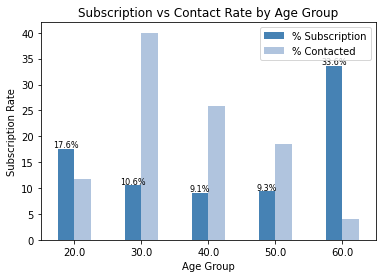

In [23]:
# Setup plot
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('steelblue','lightsteelblue'))
 
# Adding title
plt.title('Subscription vs Contact Rate by Age Group')
plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_age.patches,
                      age['% Subscription'].round(1).astype(str)):
    plot_age.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.25, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black',
                      size = 8)
    
plt.legend()
plt.show()

    60대 이상이 가장 높고, 다음으로는 20대가 가장 높았다. 이 이유는, 노년층의 경우 주요 투자 목적이 노후를 위한 저축이기 때문이고, 20대 들은 주식이나 위험한 투자에 투자할 전문 지식이 없을 확률이 높다. 반며느 30대 ~ 50대는 다른 곳에 공격적인 투자를 하기에 연락처에 비해 정기예금의 수치가 높지 않았다. 연락처를 늘리거나 가장 나이가 많고, 어린 사람을 더 많이 타켓팅하는게 정기 예금 고객 확보에 유리하다.

    2. 잔액과 출력 변수 y 와의 특징 

In [24]:
df.loc[df["balance"] <= 0,  'balance_group'] = 'no balance'
df.loc[(df["balance"] > 0) & (df["balance"] <= 1000), 'balance_group'] = 'low balance'
df.loc[(df["balance"] > 1000) & (df["balance"] <= 5000), 'balance_group'] = 'average balance'
df.loc[(df["balance"] > 5000), 'balance_group'] = 'high balance'

In [25]:
# Setup a new dataframe by balance_group (Subscription, Non-Subscription) groupby and then transform to percentage

balance_rate_sub = df[df['y'] == 'yes'][['balance_group', 'y']].groupby('balance_group').count()
balance_rate_nosub = df[df['y'] == 'no'][['balance_group', 'y']].groupby('balance_group').count()

balance_rate_sub.y = balance_rate_sub.y/balance_rate_sub.y.sum() * 100
balance_rate_nosub.y = balance_rate_nosub.y/balance_rate_nosub.y.sum() * 100

print(balance_rate_sub)
print(balance_rate_nosub)

                         y
balance_group             
average balance  34.165249
high balance      8.338060
low balance      48.005294
no balance        9.491397
                         y
balance_group             
average balance  24.996243
high balance      6.021742
low balance      52.003908
no balance       16.978107


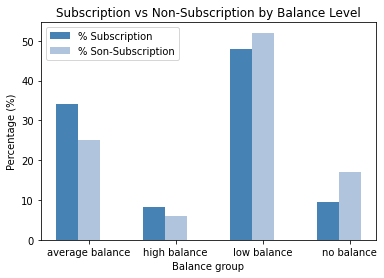

In [26]:
# Set position of bar on X axis
barWidth = 0.25
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]

# plot 만들기
plt.bar(br1, balance_rate_sub.y, color ='steelblue', width = barWidth,
        label ='% Subscription')
plt.bar(br2,  balance_rate_nosub.y, color ='lightsteelblue', width = barWidth,
        label ='% Son-Subscription')
 
# title 및 labels 생성
plt.title('Subscription vs Non-Subscription by Balance Level')
plt.xlabel('Balance group')
plt.ylabel('Percentage (%)')
plt.xticks([r + barWidth for r in range(4)],
        balance_rate_sub.index)
 
plt.legend()
plt.show()

In [27]:
count_balance_response = pd.crosstab(df['y'], df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response = count_balance_response.transpose()

balance = pd.DataFrame(df['balance_group'].value_counts())
balance = balance.reindex(balance_rate_sub.index)
balance['% Contacted'] = balance['balance_group']*100/balance['balance_group'].sum()
balance['% Subscription'] = count_balance_response['yes']
balance.drop('balance_group',axis = 1,inplace = True)

display(balance)

,% Contacted,% Subscription
balance_group,,
average balance,26.068877,15.331750
high balance,6.292716,15.500879
low balance,51.536131,10.896996
no balance,16.102276,6.895604


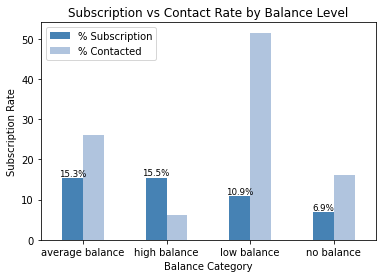

In [28]:
# Setup plot
plot_balance = balance[['% Subscription','% Contacted']].plot(kind = 'bar', color = ('steelblue','lightsteelblue'))
 
# Adding title
plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      balance['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 0.5, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black',
                      size = 8.7)
    
plt.legend()
plt.show()

    잔액이 높은 사람일수록 정기예금에 가입을 많이 해두는 것을 알 수 있다. 연락을 해도 잔액이 높은 사람에게 하는 것이 낫다.

    3. 직업과 출력 변수 y 와의 특징 

In [29]:
count_job_response = pd.crosstab(df['y'], df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response = count_job_response.transpose()

display(count_job_response)

y,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


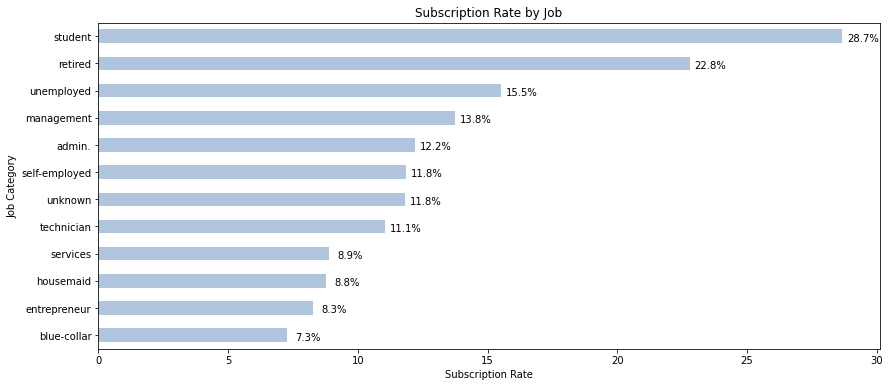

In [30]:
plot_job = count_job_response['yes'].sort_values(ascending = True).plot(kind ='barh',color = 'lightsteelblue', figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

    학생과 은퇴한 고객이 가입의 50 % 이상을 차지함을 알 수 있다. 이는 연령별 분석에서과 일치함을 알 수 있다. 
    즉, 직업적인 부분도 무시할 수 없는 부분이므로 꼭 인코딩하여 학습에 사용되어야 한다.

    4. 고객과 접촉 기간의 연관성 

In [31]:
month_sort = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

count_month_response = pd.crosstab(df['y'], df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response = count_month_response.transpose()
count_month_response = count_month_response.reindex(month_sort)

month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response['yes']
month.drop('month',axis = 1,inplace = True)
month = month.reindex(month_sort)

display(month)

,% Contacted,% Subscription
jan,3.103227,10.121169
feb,5.859194,16.647792
mar,1.055053,51.991614
apr,6.485147,19.679400
may,30.448342,6.719454
jun,11.813497,10.222805
jul,15.250713,9.093546
aug,13.817434,11.013286
sep,1.280662,46.459413
oct,1.632346,43.766938


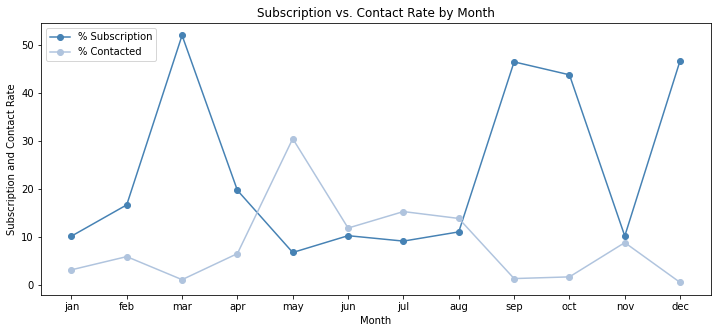

In [32]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line', color = ('steelblue', 'lightsteelblue'), figsize = (12,5),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(0,12,1)
plt.xticks(ticks, month_sort)
plt.show()

    은행은 5월에 연락을 많이 하였지만, 정기예금에 가입한 고객은 3월과 9월, 10월, 12월 등이 가장 높았다. 

# PART II - Preprocessing (Encoding)

모든 데이터의 인코딩 및 데이터 전처리

    모든 데이터를 사용하기 위해서 카테고리 데이터들을 모두 encoding 해준다.

In [33]:
# 데이터 불러오기
df = pd.read_csv('bank_marketing.csv')

In [34]:
# 출력변수 '정기예금' 'y'의 인코딩
df.y.replace({'no': 0, 'yes': 1}, inplace = True)

In [35]:
# 입력변수 'month'의 인코딩 
# one-hot encoding을 하는 것이 가장 좋으나 너무 고차원 데이터로 over-sampling 되는 것을 막기 위해 월별의 경우,
# 아래와 같이 숫자로 encoding 시켜준다. 만약, 데이터 성능이 많이 안좋으면 다시 encoding 하고자 한다.
df.month.replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 
                  'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}, inplace = True)

# 입력변수 'default'의 인코딩
df.default.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'housing'의 인코딩
df.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'loan'의 인코딩
df.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)

# 입력변수 'marital'의 인코딩
marital_dummies = pd.get_dummies(df['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
df = pd.concat([df, marital_dummies], axis=1)

# 입력변수 'job의 인코딩
job_dummies = pd.get_dummies(df['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
df= pd.concat([df, job_dummies], axis=1)

# 입력변수 'education'의 인코딩
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
df = pd.concat([df, education_dummies], axis=1)

# 입력변수 'contact'의 인코딩
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
df = pd.concat([df, contact_dummies], axis=1)

# 입력변수 'poutcome'의 인코딩
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
df = pd.concat([df, poutcome_dummies], axis=1)

# 입력변수 'pdays'의 인코딩
df['pdays'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [36]:
# 카테고리 데이터인'marital','job', 'education', 'contact', 'poutcome'열을 삭제하고 수치 데이터만 남기게 만들어준다.
df.drop(['marital', 'job', 'education', 'contact', 'poutcome'], axis=1,inplace=True)

In [37]:
df.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

In [38]:
display(df)

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,5,261,1,0,...,0,0,0,0,1,0,0,0,0,0
1,44,0,29,1,0,5,5,151,1,0,...,1,0,0,1,0,0,0,0,0,0
2,33,0,2,1,1,5,5,76,1,0,...,0,0,0,1,0,0,0,0,0,0
3,47,0,1506,1,0,5,5,92,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,5,198,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,0,...,1,0,0,0,1,1,0,0,0,0
45207,71,0,1729,0,0,17,11,456,2,0,...,0,0,1,0,0,1,0,0,0,0
45208,72,0,5715,0,0,17,11,1127,5,1,...,0,0,0,1,0,1,0,0,0,1
45209,57,0,668,0,0,17,11,508,4,0,...,0,0,0,1,0,0,1,0,0,0


In [39]:
# 인코딩 후의 데이터 세트 저장
df.to_csv('bank_marketing_dataset.csv', index=False)

# PART III - Supervised learning

    지도 학습을 통해 데이터를 학습 시키고 성능을 평가한다. 

In [40]:
# Train and Test dataset
X = df.drop('y', axis=1)
y = df['y']

In [41]:
# dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [42]:
# dataset 크기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 32), (9043, 32), (36168,), (9043,))

In [43]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [44]:
#!pip install sklearn

In [45]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import svm

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# KNN
for k in range(2,10):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    y_test_pred =  knn.predict(X_test_scaled)
    knn_test_acc = accuracy_score(y_test,y_pred)
    knn_train_acc = knn.score(X_train_scaled,y_train)
     
    print(f"K={k} 일때 train acc.는 {knn_train_acc*100:.2f}%".format(k,knn_train_acc))
    print(f"K={k} 일때 test acc.는 {knn_test_acc*100:.2f}%".format(k,knn_test_acc))
    
    print()

In [ ]:
knn3= KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled,y_train)
knn3_train_pred = knn3.predict(X_train_scaled)
knn3_test_pred =  knn3.predict(X_test_scaled)
print("KNN method의 train dataset에 대한 성능 평가: \n",classification_report(y_train, knn3_train_pred))
print("KNN method의 test dataset에 대한  성능 평가: \n",classification_report(y_test, knn3_test_pred))

In [ ]:
# Decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_scaled, y_train)
tree_train_pred=tree.predict(X_train_scaled)
tree_test_pred = tree.predict(X_test_scaled)
print("예측값: ", tree_test_pred[:100])
print("실제값:  ", y_test[:100].to_numpy())
print( tree_test_pred[:100] == y_test[:100].to_numpy() )

In [ ]:
# Tree 성능 평가
print("Tree method의 train dataset에 대한 성능 평가: \n", classification_report(y_train, tree_train_pred))
print("Tree method의 test dataset에 대한 성능 평가: \n", classification_report(y_test, tree_test_pred))

In [ ]:
# SVM
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001).fit(X_train_scaled,y_train)
svm_train_pred = svc.predict(X_train_scaled)
svm_test_pred = svc.predict(X_test_scaled)
print("예측값: ", svm_test_pred[:100])
print("실제값: ", y_test[:100].to_numpy())
print( svm_test_pred[:100] == y_test[:100].to_numpy() )

In [ ]:
# SVM 성능 평가
print("SVM의 train dataset에 대한 성능 평가: \n",classification_report(y_train, svm_train_pred))
print("SVM의 test dataset에 대한 성능 평가: \n",classification_report(y_test, svm_test_pred))

In [ ]:
# Naive Bayes
nb= GaussianNB()
nb.fit(X_train_scaled,y_train)
nb_train_pred = nb.predict(X_train_scaled)
nb_test_pred = nb.predict(X_test_scaled)
print("예측값: ", nb_test_pred[:100])
print("실제값: ", y_test[:100].to_numpy())
print( nb_test_pred[:100] == y_test[:100].to_numpy() )

In [ ]:
# Naive Bayes 성능 평가
print("NB method의 train dataset에 대한 성능 평가: \n", classification_report(y_train, nb_train_pred))
print("NB method의 test dataset에 대한 성능 평가: \n", classification_report(y_test, nb_test_pred))

In [ ]:
# 모델 성능 비교, "KNN3", "Tree", "SVM", "NB"

report_knn3_train =classification_report(y_train,knn3_train_pred, output_dict=True )
report_knn3_test =classification_report(y_test,knn3_test_pred, output_dict=True )

report_tree_train =classification_report(y_train, tree_train_pred, output_dict=True )
report_tree_test =classification_report(y_test, tree_test_pred, output_dict=True )

report_svm_train =classification_report(y_train, svm_train_pred, output_dict=True )
report_svm_test =classification_report(y_test, svm_test_pred, output_dict=True )

report_nb_train =classification_report(y_train, nb_train_pred, output_dict=True )
report_nb_test =classification_report(y_test, nb_test_pred, output_dict=True )

In [ ]:
confusion_matrix

In [ ]:
# Confusion matrix 시각화
models=[knn3, tree, svc, nb]
models_name=["KNN3", "Tree", "SVM", "NB"]

fig, axes = plt.subplots(1,4, figsize=(20, 5))
fig.tight_layout(pad=5.0)
for model, ax, model_name in zip(models, axes.flatten(), models_name):
    
    plot=plot_confusion_matrix(model, X_test_scaled, y_test, display_labels=["No","Yes"], ax=ax)
    
    ax.tick_params(axis='x')
    plot.ax_.set_title("Confusion Matrix "+model_name)

In [ ]:
df_scores = {'model_name':  ['KNN3', 'Tree', 'SVM', 'NB'],
          'accuracy_train': [report_knn3_train['accuracy'], 
                             report_tree_train['accuracy'], 
                             report_svm_train['accuracy'],
                             report_nb_train['accuracy'] ] ,
           'accuracy_test': [report_knn3_test['accuracy'],
                             report_tree_test['accuracy'], 
                             report_svm_test['accuracy'],
                             report_nb_test['accuracy'] ] ,
         'precision_train': [report_knn3_train['macro avg']['precision'],
                             report_tree_train['macro avg']['precision'], 
                             report_svm_train['macro avg']['precision'],
                             report_nb_train['macro avg']['precision'] ] ,
          'precision_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'], 
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
            'recall_train': [report_knn3_train['macro avg']['recall'],
                             report_tree_train['macro avg']['recall'], 
                             report_svm_train['macro avg']['recall'],
                             report_nb_train['macro avg']['recall']] ,
             'recall_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'],
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
                'f1_train': [report_knn3_train['macro avg']['f1-score'],
                             report_tree_train['macro avg']['f1-score'],
                             report_svm_train['macro avg']['f1-score'],
                             report_nb_train['macro avg']['f1-score'] ] ,
                 'f1_test': [report_knn3_test['macro avg']['f1-score'],
                            report_tree_test['macro avg']['f1-score'],
                            report_svm_test['macro avg']['f1-score'],
                            report_nb_test['macro avg']['f1-score'] ], 
            }

scores = pd.DataFrame(df_scores)
scores.set_index('model_name', inplace=True)

In [ ]:
output = scores.style.format({
    'accuracy_train': '{:,.2%}'.format,
    'accuracy_test': '{:,.2%}'.format,
    'precision_train': '{:,.2%}'.format,
    'precision_test': '{:,.2%}'.format,
    'recall_train': '{:,.2%}'.format,
    'recall_test': '{:,.2%}'.format,
    'f1_train': '{:,.2%}'.format,
    'f1_test': '{:,.2%}'.format,
})

display(output)

In [ ]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
score1=scores.loc[:,['accuracy_train', 'accuracy_test']]
score1.plot(kind='bar', figsize = (14, 5), ax=ax1)

score2=scores.loc[:,['precision_train', 'precision_test', 'recall_train', 'recall_test', 'f1_train', 'f1_test']]
score2.plot(kind='line', marker='o', figsize = (14, 5), ax=ax2)

plt.show()

# PART IV - Unsupervised learning

주어진 데이터는 y가 있는 데이터라 지도학습만 수행하면 되지만 공부를 위해 비지도학습도 수행해보았다.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

    1. K-means clustering

In [ ]:
# K-means clustering 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 최적의 k가 맞는지 확인하기 위해 elbow method를 사용
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    tot.append(kmeans.inertia_)
    
plt.plot(range(2, 10), tot, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('tot')
plt.show()

In [ ]:
display(tot)

In [ ]:
acc = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    correct_labels = sum(y == kmeans.labels_)
    acc.append(correct_labels/float(y.size))

plt.plot(range(2, 10), acc, marker='o')
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# k = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

In [ ]:
correct_labels = sum(y == kmeans.labels_)
print("결과: %d sample 중에 %d sample이 맞다." % (y.size, correct_labels))
print('정확도: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
# K-means clustering with PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

In [ ]:
# Elbow method
sse = {} #sum of squeared  errors
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Silhouette Coefficient Method
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 


In [ ]:
# k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_principal)

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 2).fit_predict(X_principal), cmap ='Blues') 
plt.show()

In [ ]:
# k=9
kmeans = KMeans(n_clusters=9)
kmeans.fit(X_principal)

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 9).fit_predict(X_principal), cmap ='Blues') 
plt.show()

    2. Hierarchical Agglomerative Clustering

In [ ]:
# Hierarchical Agglomerative Clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=False)
model_ac = ac.fit(X_train_scaled)
train_pred = model_ac.fit_predict(X_train_scaled)
test_pred = model_ac.fit_predict(X_test_scaled)
print(train_pred.shape, y_train.shape)
print(test_pred.shape, y_test.shape)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

from sklearn.metrics import classification_report
print("train dataset의 성능 평가: \n",classification_report(y_train,train_pred))
print("test dataset의 성능 평가: \n",classification_report(y_test,test_pred))

    3. DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=500)

model_dbscan = dbscan.fit(X_train_scaled)
train_pred = list(map(lambda x: x+1, model_dbscan.fit_predict(X_train_scaled)))
test_pred = list(map(lambda x: x+1, model_dbscan.fit_predict(X_test_scaled)))

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("train dataset의 성능 평가: \n",classification_report(y_train,train_pred))
print("test dataset의 성능 평가: \n",classification_report(y_test,test_pred))

In [ ]:
# #Classifiers load and hyper-parameters setting
# #Costs setting

# names = [
#     "Nearest Neighbors",
#     "Linear SVM",
#     "RBF SVM",
#     "Gaussian Process",
#     "Decision Tree",
#     "Random Forest",
#     "Neural Net",
#     "AdaBoost",
#     "Naive Bayes",
#     "QDA",
# ]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]

In [ ]:
# #Virtual dataset generation

# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# rng = np.random.RandomState(2)
# X += 2 * rng.uniform(size=X.shape)
# linearly_separable = (X, y)

# datasets = [
#     make_moons(noise=0.3, random_state=0)
# ]

# # Modify the class distribution of the first dataset to make it imbalanced
# imbalance_ratio = 0.05   # Set the ratio of the minority class to the majority class
# for i in [0,1,2]:
#     X, y = datasets[i]
#     num_minority = int(np.sum(y) * imbalance_ratio)
#     minority_indices = np.where(y == 1)[0][:num_minority]
#     majority_indices = np.where(y == 0)[0]
#     X_imb = np.concatenate((X[minority_indices], X[majority_indices]), axis=0)
#     y_imb = np.concatenate((y[minority_indices], y[majority_indices]), axis=0)
#     datasets[i] = (X_imb, y_imb)

In [ ]:
# #training and visualization of classification results

# figure = plt.figure(figsize=(27, 9))
# i = 1
# # iterate over datasets
# for ds_cnt, ds in enumerate(datasets):
#     # preprocess dataset, split into training and test part
#     X, y = ds
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.4, random_state=42
#     )

#     x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
#     y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(["#FF0000", "#0000FF"])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
#     # Plot the testing points
#     ax.scatter(
#         X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
#     )
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

#     # iterate over classifiers
#     for name, clf in zip(names, classifiers):
#         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

#         clf = make_pipeline(StandardScaler(), clf)
#         clf.fit(X_train, y_train)
#         score = clf.score(X_test, y_test)
#         DecisionBoundaryDisplay.from_estimator(
#             clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
#         )

#         # Plot the training points
#         ax.scatter(
#             X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
#         )
#         # Plot the testing points
#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c=y_test,
#             cmap=cm_bright,
#             edgecolors="k",
#             alpha=0.6,
#         )

#         ax.set_xlim(x_min, x_max)
#         ax.set_ylim(y_min, y_max)
#         ax.set_xticks(())
#         ax.set_yticks(())
#         if ds_cnt == 0:
#             ax.set_title(name)
#         ax.text(
#             x_max - 0.3,
#             y_min + 0.3,
#             ("%.2f" % score).lstrip("0"),
#             size=15,
#             horizontalalignment="right",
#         )
#         i += 1

# plt.tight_layout()
# plt.show()

# PART V - Deep learning

In [ ]:
# Train and Test dataset
X = df.drop('y', axis=1)  # 데이터프레임에서 타겟값(y)을 제외
y = df['y']               # 타겟값(y) 추출

In [ ]:
print(type(X))   # DataFrame type
print(type(y))   # Series type

In [ ]:
X = X.to_numpy() # 데이터프레임에서 타겟값(y)을 제외하고 넘파이 배열로 만들기
y = y.to_numpy().reshape((-1,1)) # 데이터프레임 형태의 타겟값을 넘파이 배열로 만들기
print(type(X))   # Numpy Array
print(type(y))   # Numpy Array

In [ ]:
# 데이터 스케일링
# sklearn에서 제공하는 MinMaxScaler 
# (X-min(X))/(max(X)-min(X))을 계산
scaler = MinMaxScaler() 
scaler.fit(X) 
X = scaler.transform(X)

scaler.fit(y)
y = scaler.transform(y)

In [ ]:
# torch의 Dataset 을 상속.
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [ ]:
# dataset 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)
print("The shape of y_train: ", y_train.shape)
print("The shape of y_test: ", y_test.shape)

In [ ]:
# 학습 데이터, 시험 데이터 배치 형태로 구축하기
trainsets = TensorData(X_train, y_train)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size=32, shuffle=True)

testsets = TensorData(X_test, y_test)
testloader = torch.utils.data.DataLoader(testsets, batch_size=32, shuffle=False)

In [ ]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc1 = nn.Linear(32, 64, bias=True) # 입력층(13) -> 은닉층1(50)으로 가는 연산
        self.fc2 = nn.Linear(64, 32, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc3 = nn.Linear(32, 1, bias=True) # 은닉층2(30) -> 출력층(1)으로 가는 연산
        self.dropout = nn.Dropout(0.1) # 연산이 될 때마다 20%의 비율로 랜덤하게 노드를 없앤다.

    def forward(self, x): # 모델 연산의 순서를 정의
        x = F.relu(self.fc1(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = self.dropout(F.relu(self.fc2(x))) # 은닉층2에서 드랍아웃을 적용한다.(즉, 30개의 20%인 6개의 노드가 계산에서 제외된다.)
        x = F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
      
        return x
    
# 주의 사항
# 드랍아웃은 과적합(overfitting)을 방지하기 위해 노드의 일부를 배제하고 계산하는 방식이기 때문에 절대로 출력층에 사용해서는 안 된다.

In [ ]:
model = Regressor()
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-7)

In [ ]:
loss_ = [] # loss를 저장할 리스트.
acc_ = [] # acc를 저장할 리스트.
n = len(trainloader)
num_epochs = 50
print(n)
print(len(trainsets))

for epoch in range(num_epochs):

    running_loss = 0.0 # 한 에폭이 돌 때 그안에서 배치마다 loss가 나온다. 즉 한번 학습할 때 그렇게 쪼개지면서 loss가 다 나오니 MSE를 구하기 위해서 사용한다.
    correct = 0
    for i, data in enumerate(trainloader, 0): # 무작위로 섞인 32개의 데이터가 담긴 배치가 하나씩 들어온다.
    
        inputs, values = data # data에는 X, Y가 들어있다.

        optimizer.zero_grad() # 최적화 초기화.

        outputs = model(inputs) # 모델에 입력값을 넣어 예측값을 산출한다.
        loss = criterion(outputs, values) # 손실함수를 계산. error 계산.
        loss.backward() # 손실 함수를 기준으로 역전파를 설정한다.
        optimizer.step() # 역전파를 진행하고 가중치를 업데이트한다.

        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.    
        correct += (outputs == values).float().sum()

    accuracy = 100 * correct / len(trainsets)

    #print("Accuracy = {},".format(accuracy))

    print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, running_loss/n, accuracy))
    loss_.append(running_loss) # MSE(Mean Squared Error) 계산
    acc_.append(accuracy)

In [ ]:
plt.plot(loss_)
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(acc_)
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
def evaluation(dataloader):

    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서.
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서.

    with torch.no_grad():
        model.eval() # 평가를 할 땐 반드시 eval()을 사용해야 한다.

        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

        predictions = torch.cat((predictions, outputs), 0) # cat함수를 통해 예측값을 누적.
        actual = torch.cat((actual, values), 0) # cat함수를 통해 실제값을 누적.

    predictions = predictions.numpy() # 넘파이 배열로 변경.
    actual = actual.numpy() # 넘파이 배열로 변경.
    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용해 RMSE를 계산.

    return rmse, actual, predictions

In [ ]:
train_rmse, train_actual, train_pred = evaluation(trainloader) # 원래는 이렇게 하면 안되지만, 비교를 위해서 train을 넣어서 본다. 
test_rmse, test_actual, test_pred = evaluation(testloader)

print(f'train rmse:{train_rmse}')
print(f'test rmse:{test_rmse}')

In [ ]:
# 성능 평가
train_pred = train_pred.flatten() # 차원 펴주기
train_actual = train_actual.flatten()
train_pred_class = np.where(train_pred > 0.5, 1 , 0) #0.5보다크면 1, 작으면 0

test_pred = test_pred.flatten() # 차원 펴주기
test_actual = test_actual.flatten()
test_pred_class = np.where(test_pred > 0.5, 1 , 0) #0.5보다크면 1, 작으면 0
print(test_pred_class)
print(test_actual)

In [ ]:
print("train dataset의 성능 평가: \n",classification_report(train_actual, train_pred_class))
print("teset dataset의 성능 평가: \n",classification_report(test_actual, test_pred_class))

 성능이 잘 나오진 않았지만 공부를 해볼 수 있었다. 아래의 MLPClassifier를 이용하면 acc.가 높음을 확인할 수 있다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
mlp_pred = mlp.predict(X_test_scaled)
print("예측값 :", mlp_pred[:100])
print("실제값 :", y_test[:100])

In [ ]:
mlp_test_accuracy=metrics.accuracy_score(y_test,mlp_pred)
mlp_train_accuracy=mlp.score(X_train_scaled,y_train)
print(f"train acc.: {mlp_train_accuracy*100:.2f}%")
print(f"test acc.: {mlp_test_accuracy*100:.2f}%")


In [ ]:
df_scores = {'model_name':  ['KNN3', 'Tree', 'SVM', 'NB'],
          'accuracy_train': [report_knn3_train['accuracy'], 
                             report_tree_train['accuracy'], 
                             report_svm_train['accuracy'],
                             report_nb_train['accuracy'] ] ,
           'accuracy_test': [report_knn3_test['accuracy'],
                             report_tree_test['accuracy'], 
                             report_svm_test['accuracy'],
                             report_nb_test['accuracy'] ] ,
         'precision_train': [report_knn3_train['macro avg']['precision'],
                             report_tree_train['macro avg']['precision'], 
                             report_svm_train['macro avg']['precision'],
                             report_nb_train['macro avg']['precision'] ] ,
          'precision_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'], 
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
            'recall_train': [report_knn3_train['macro avg']['recall'],
                             report_tree_train['macro avg']['recall'], 
                             report_svm_train['macro avg']['recall'],
                             report_nb_train['macro avg']['recall']] ,
             'recall_test': [report_knn3_test['macro avg']['precision'],
                             report_tree_test['macro avg']['precision'],
                             report_svm_test['macro avg']['precision'],
                             report_nb_test['macro avg']['precision'] ] ,
                'f1_train': [report_knn3_train['macro avg']['f1-score'],
                             report_tree_train['macro avg']['f1-score'],
                             report_svm_train['macro avg']['f1-score'],
                             report_nb_train['macro avg']['f1-score'] ] ,
                 'f1_test': [report_knn3_test['macro avg']['f1-score'],
                            report_tree_test['macro avg']['f1-score'],
                            report_svm_test['macro avg']['f1-score'],
                            report_nb_test['macro avg']['f1-score'] ], 
            }

scores = pd.DataFrame(df_scores)
scores.set_index('model_name', inplace=True)

In [ ]:
output = scores.style.format({
    'accuracy_train': '{:,.2%}'.format,
    'accuracy_test': '{:,.2%}'.format,
    'precision_train': '{:,.2%}'.format,
    'precision_test': '{:,.2%}'.format,
    'recall_train': '{:,.2%}'.format,
    'recall_test': '{:,.2%}'.format,
    'f1_train': '{:,.2%}'.format,
    'f1_test': '{:,.2%}'.format,
})

display(output)

    머신러닝 지도학습을 수행한 결과, KNN3 이 비교적 잘 수행됨을 확인할 수 있었다. 
    KNN3의 경우 accuracy_train가 93.18 %로 매우 높게 나타났고, accuracy_test도 88.84 % 도 높음을 알 수 있다.
    
    위의 MLP Classifier 의 경우, train acc.: 93.13%, test acc.: 89.23% 으로 KNN3와 성능이 비슷하였다. 
    주어진 데이터는 MLP가 아닌 KNN3 만으로도 잘 수행됨을 확인할 수 있었다.